In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글폰트 설정
import matplotlib
import matplotlib.font_manager as fm

font_path = "C:\\Windows\\Fonts\\gulim.ttc" # 윈도우 OS 폰트 경로 - 글씨체 속성에서 위치 확인 가능
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name) # font를 key value로 등록

# 만약 '-' 안 나올 경우
plt.rc('axes', unicode_minus=False) # matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화, 아스키코드 마이너스 사용

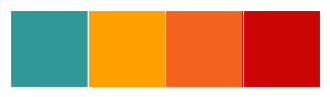

In [3]:
my_colors = ['#309898', '#FF9F00', '#F4631E', '#CB0404']

sns.palplot(my_colors)

## 01. 데이터 수집 및 로드

In [4]:
penguins_df = pd.read_csv('./data/penguins_size.csv')
penguins_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 02. 데이터 구조 및 변수 이해

In [5]:
print(penguins_df.shape) # (344, 7) / 344행 7열
print(penguins_df.columns)
print(penguins_df.dtypes)

(344, 7)
Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')
species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [6]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
print('중복된 행 수: ', penguins_df.duplicated().sum()) # 중복값 없음

중복된 행 수:  0


In [8]:
# 범주형 데이터
cat_columns = penguins_df.select_dtypes('object').columns.to_list()

for col in cat_columns:
    print(col, ': ', end = '')
    print(penguins_df[col].unique())

species : ['Adelie' 'Chinstrap' 'Gentoo']
island : ['Torgersen' 'Biscoe' 'Dream']
sex : ['MALE' 'FEMALE' nan '.']


## 03. 데이터 요약 및 기술 통계

In [9]:
penguins_df.describe() # 숫자형 데이터

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [10]:
penguins_df.describe(include='object') # object형 데이터

,species,island,sex
count,344,344,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,152,168,168


In [11]:
penguins_df.describe(include='all') # 숫자형 + 문자형

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [12]:
# 범주형 데이터 value_counts() 활용
print(penguins_df.value_counts('species'), end='\n\n')
print(penguins_df.value_counts('island'), end='\n\n')
print(penguins_df.value_counts('sex'), end='\n\n')

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64



## 04. 결측치, 이상치 탐지

In [13]:
penguins_df.isna().sum()
## culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g: null 값 2개씩
## sex: null 값 10

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

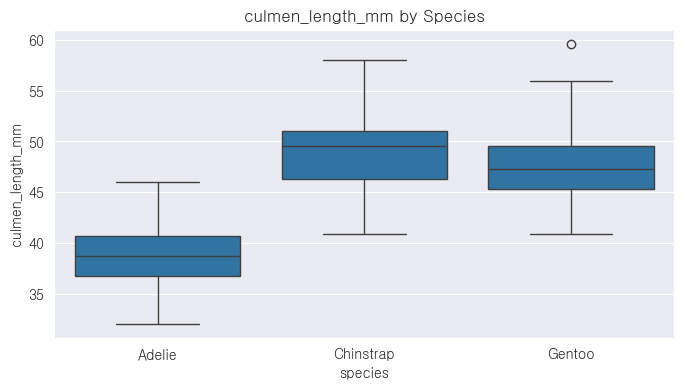

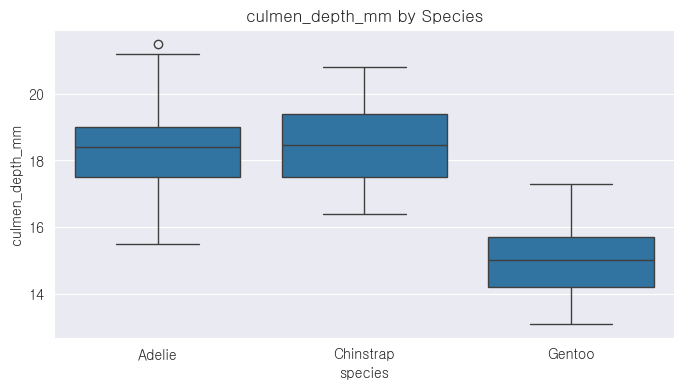

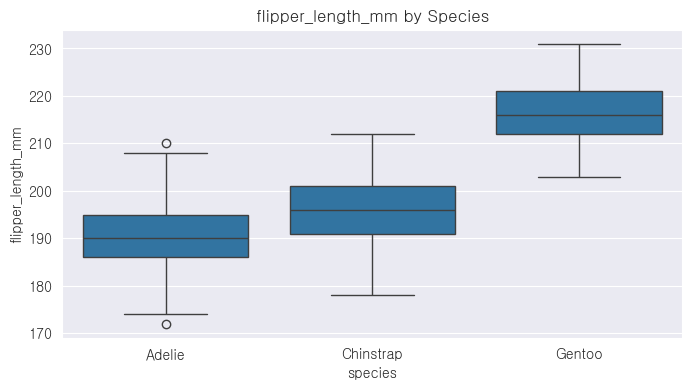

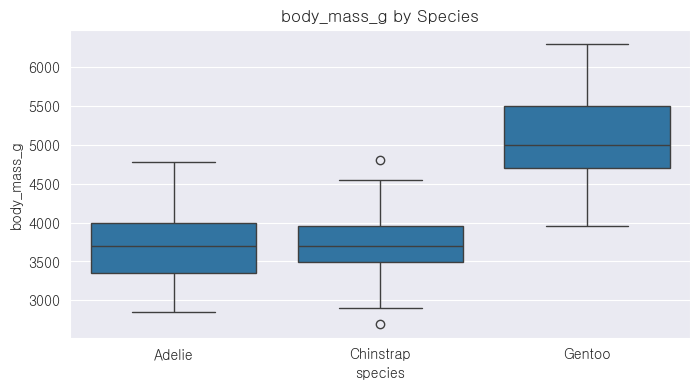

In [14]:
# species 별 수치형 변수 분포
numeric_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='species', y=col, data=penguins_df)
    plt.title(f'{col} by Species')
    plt.show()

## 05. 데이터 전처리
- 결측치/중복값/이상치 처리
- 불필요한 컬럼 제거

In [15]:
penguins_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [16]:
penguins_df[penguins_df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [17]:
# '.' 값을 NaN으로 변경
import numpy as np

penguins_df['sex'] = penguins_df['sex'].replace({'.': np.nan})
penguins_df[penguins_df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [18]:
penguins_df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [19]:
penguins_df = penguins_df.dropna() # null 값 행 다 삭제
penguins_df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## 06. 변수분포 시각화

Text(0.5, 0.98, 'Penguin Species (Target) Distribution')

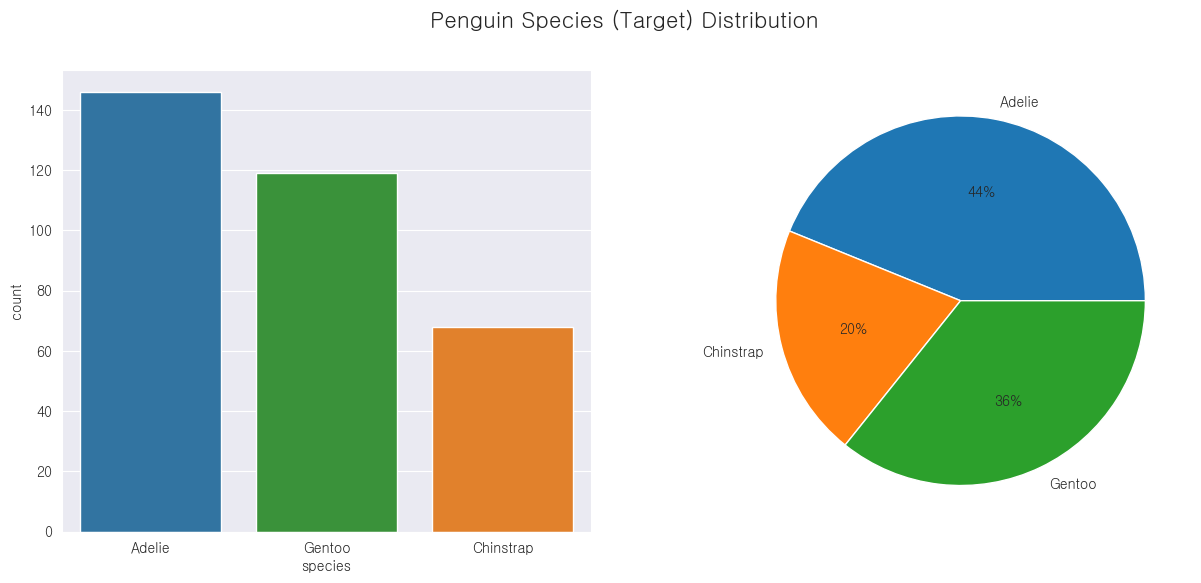

In [20]:
# 펭귄종 비율
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Countplot
sns.countplot(data=penguins_df, x= 'species', hue='species',
              order= penguins_df['species'].value_counts().index,
              ax=axes[0])


# Pie Chart
penguins_df.groupby('species').size().plot(kind='pie', ax=axes[1], autopct='%.0f%%')

plt.suptitle('Penguin Species (Target) Distribution', fontweight = 'heavy', fontsize = '16')

Text(0.5, 0.98, 'Island Distribution')

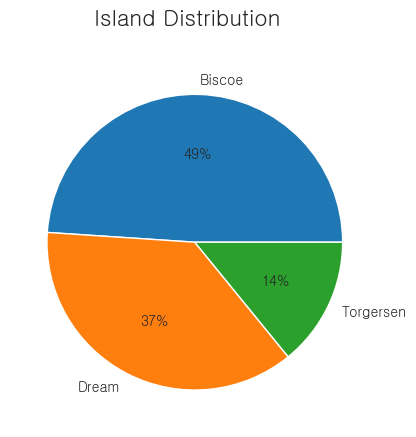

In [21]:
# 서식섬 비율
penguins_df.groupby('island').size().plot(kind='pie', autopct='%.0f%%')
plt.suptitle('Island Distribution', fontweight = 'heavy', fontsize = '16')

Text(0.5, 0.98, 'Sex Distribution')

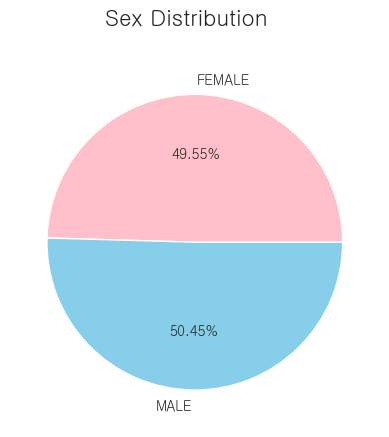

In [22]:
# 성별 비율
penguins_df.groupby('sex').size().plot(kind='pie',
                                       colors = ["pink", "skyblue"],
                                       autopct='%1.2f%%')
plt.suptitle('Sex Distribution', fontweight = 'heavy', fontsize = '16')

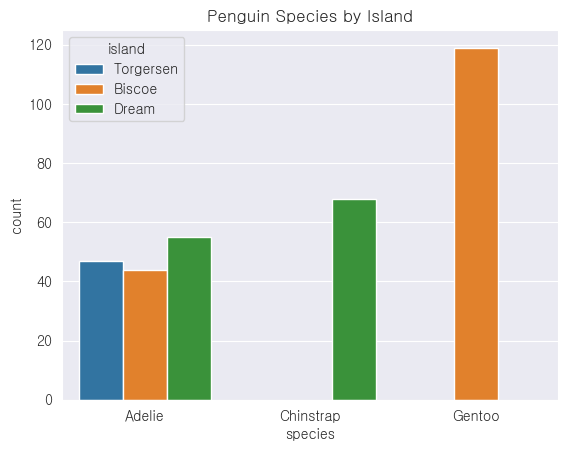

In [23]:
# 펭귄종별 서식하는 섬
sns.countplot(data=penguins_df, x='species', hue='island')
plt.title('Penguin Species by Island')
plt.show()

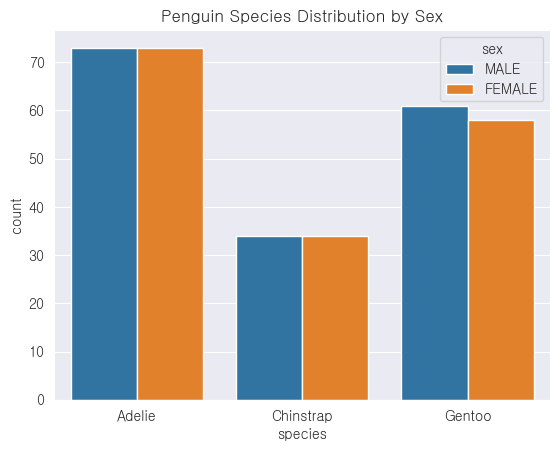

In [24]:
# 펭귄종별 성별 수
sns.countplot(data=penguins_df, x='species', hue='sex')
plt.title('Penguin Species Distribution by Sex')
plt.show()

## 07. 변수 간 관계 시각화

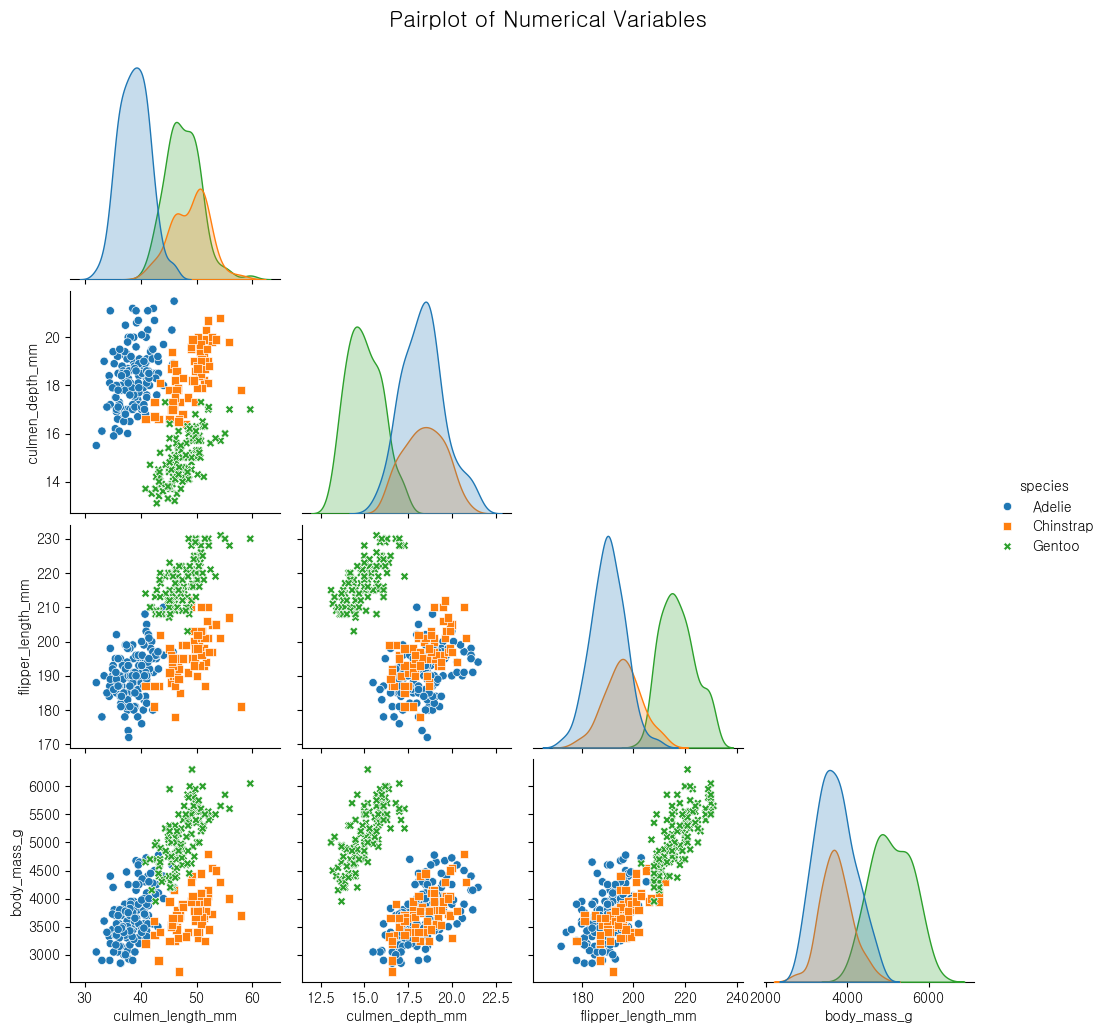

In [31]:
# pairplot으로 모든 수치형 데이터 간 관계를 한 번에 확인
num_cols = penguins_df.select_dtypes(include=['float64']).columns

sns.pairplot(penguins_df, hue = 'species', diag_kind = 'kde', markers = ['o', 's', 'X'], vars=num_cols, corner=True)

plt.suptitle('Pairplot of Numerical Variables', fontweight = 'heavy', y = 1.03, fontsize = '16')

plt.show()

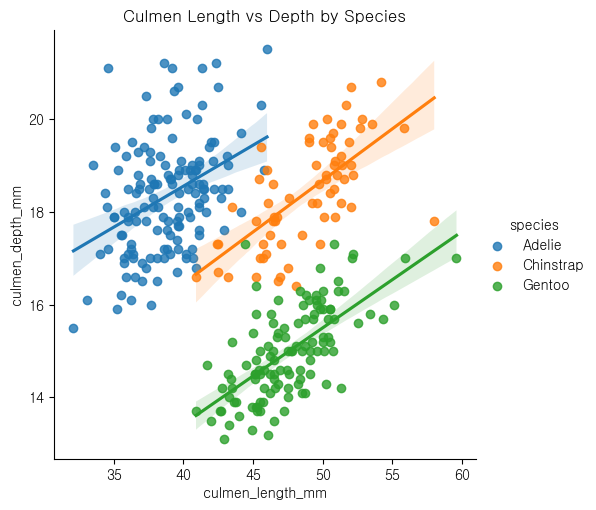

In [32]:
# 부리길이 vs 부리깊이,
sns.lmplot(x='culmen_length_mm', y='culmen_depth_mm', hue='species', data=penguins_df)
plt.title('Culmen Length vs Depth by Species')
plt.show()

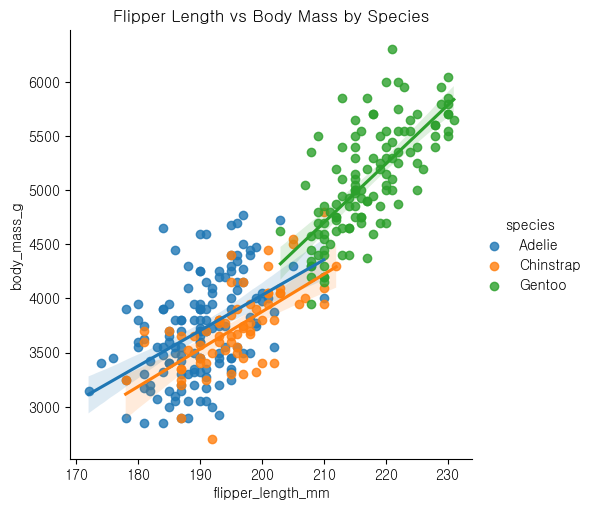

In [33]:
# 날개 길이 vs 몸무게,
sns.lmplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=penguins_df)
plt.title('Flipper Length vs Body Mass by Species')
plt.show()

## 08. 상관관계 및 교차분석
- 연속형 데이터: 상관계수
- 범주형 데이터: 교차표

In [34]:
# 상관관계 분석
corr_mat = penguins_df.corr(numeric_only=True)
corr_mat

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


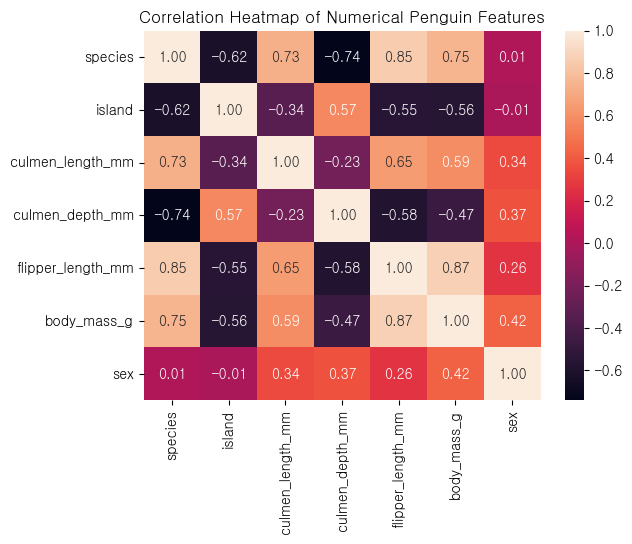

In [49]:
sns.heatmap(corr_mat, annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Penguin Features')
plt.show()

In [36]:
# 펭귄 종별 서식 섬 교차표 (범주형)
cross_table = pd.crosstab(penguins_df['species'], penguins_df['island'])
print(cross_table)

island     Biscoe  Dream  Torgersen
species                            
Adelie         44     55         47
Chinstrap       0     68          0
Gentoo        119      0          0


## 09. Feature Engineering
Feature (독립변수, 속성, 열) 가공.
- 새로운 변수 생성
- 그룹핑 처리
- 편향개선 (로그함수)
- 스케일링 (범위변경)

### 문자형 -> 수치형 변경
1. 범주형 -> 수치값

In [37]:
# 범주형 데이터 확인
print(penguins_df.value_counts('species'), end='\n\n')
print(penguins_df.value_counts('island'), end='\n\n')
print(penguins_df.value_counts('sex'), end='\n\n')

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

sex
MALE      168
FEMALE    165
Name: count, dtype: int64



In [38]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
penguins_df['species'] = LE.fit_transform(penguins_df['species'])
penguins_df['island'] = LE.fit_transform(penguins_df['island'])
penguins_df['sex'] = LE.fit_transform(penguins_df['sex'])

penguins_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


In [39]:
penguins_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


In [40]:
corr_mat = penguins_df.corr()
corr_mat

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.622428,0.730548,-0.740346,0.850737,0.750434,0.010964
island,-0.622428,1.000000,-0.337179,0.568031,-0.554413,-0.559526,-0.012435
culmen_length_mm,0.730548,-0.337179,1.000000,-0.228626,0.653096,0.589451,0.344078
culmen_depth_mm,-0.740346,0.568031,-0.228626,1.000000,-0.577792,-0.472016,0.372673
flipper_length_mm,0.850737,-0.554413,0.653096,-0.577792,1.000000,0.872979,0.255169
body_mass_g,0.750434,-0.559526,0.589451,-0.472016,0.872979,1.000000,0.424987
sex,0.010964,-0.012435,0.344078,0.372673,0.255169,0.424987,1.000000


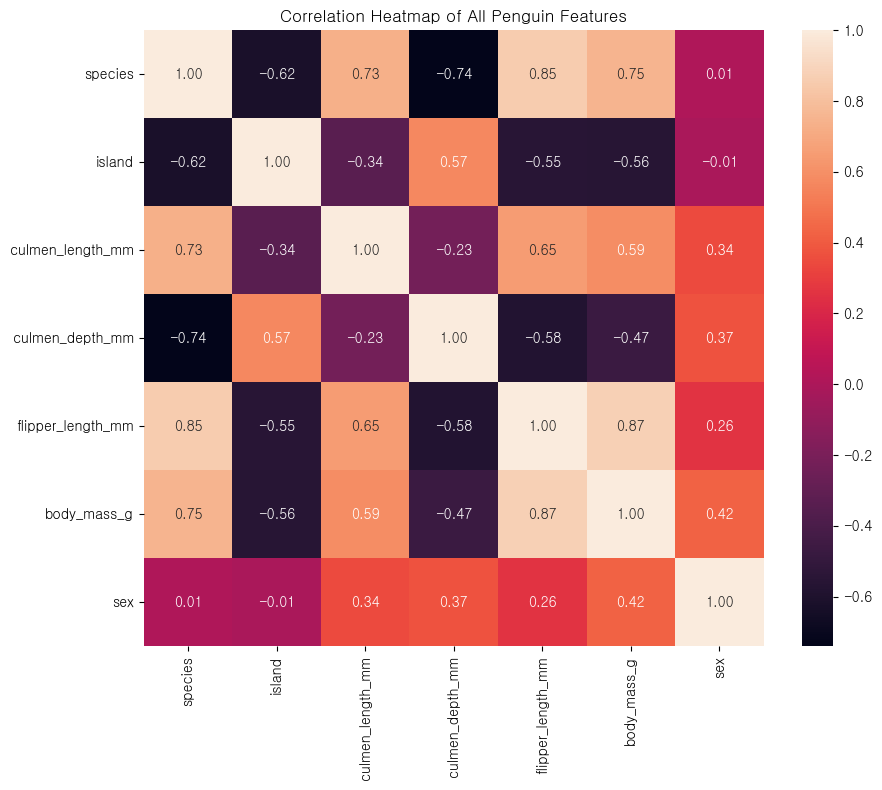

In [41]:
plt.figure(figsize=(10, 8))  # 필요에 따라 Figure 크기 조정
sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.title('Correlation Heatmap of All Penguin Features')
plt.show()

## 10. 최종요약/인사이트 도출

- Adelie, Gentoo, Chinstrap 펭귄은 생물학적 특성에서 확실한 차이를 보임
- 주요 상관관계 수치 요약:
  - `flipper_length_mm` ↔ `body_mass_g`: **0.87**
  - `culmen_length_mm` ↔ `body_mass_g`: **0.59**
  - `culmen_length_mm` ↔ `flipper_length_mm`: **0.65**
  - `culmen_length_mm` ↔ `culmen_depth_mm`: **-0.23**

- 부리 길이, 체중, 날개 길이는 종 분류에 가장 중요한 변수로 활용 가능
- 간단한 로지스틱 회귀로도 높은 정확도로 종 분류 가능함

## 11. 머신러닝 - 펭귄의 종 분류 예측 (Logistic Regression)

펭귄의 신체 특징(부리 길이, 깊이, 날개 길이, 몸무게 등)을 기반으로 `species(종)`을 예측하는 분류 모델을 구현한다. Logistic Regression을 활용한 다중 분류 작업을 진행하며, 전처리로는 표준화와 결측치 보정을 포함한다.

In [42]:
penguins_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


In [43]:
# 문제/답 구분
X = penguins_df.drop("species", axis=1)  # 종X
y = penguins_df["species"]  # Target variable

print(X.shape, y.shape) #> (333, 6) (333,)

(333, 6) (333,)


In [44]:
# 학습/테스트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, y_train.shape) #> (266, 6) (266,)
print(X_test.shape, y_test.shape) #> (67, 6) (67,)

(266, 6) (266,)
(67, 6) (67,)


In [45]:
# 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # 학습데이터 표준점수 변환
X_test_scaled = scaler.transform(X_test)   # 테스트데이터 표준점수 변환

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Logistic Regression
LogReg = LogisticRegression()
LogReg.fit(X_train_scaled, y_train)  # 스케일링된 학습 데이터 사용
y_pred_LogReg = LogReg.predict(X_test_scaled) # 스케일링된 테스트 데이터 사용
print('Logistic Regression: ', accuracy_score(y_pred_LogReg, y_test))

Logistic Regression:  1.0


In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_LogReg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

